In [1]:
# 학습 준비
# 학습 방법 : 지도학습 - 이진분류 => Linear 클래스 + sigmoid 함수
# 최적화방법 : 경사하강법 기반의 방법 => Adam, RMSprop, Adagrad, SGD
# 손실함수 : 이진분류 손실 계산 함수 => binary_cross_entropy
from sklearn.datasets import fetch_openml
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.model_selection import train_test_split
db = fetch_openml('Fashion-MNIST', version=1)

c:\Users\mathn\.conda\envs\Torch_PY38\lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [73]:
feature = db.data/255
target = db.target
target=target.astype("int64")
target=target==1
target=target.astype("int64")
x_train,x_test,y_train,y_test = train_test_split(feature,target,test_size=1/7,random_state=42)
x_train = torch.tensor(x_train.values).float()
y_train = torch.tensor(y_train.values).float()
y_train.unsqueeze_(1)


tensor([[0.],
        [1.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]])

In [74]:
# 방법 2
import pandas as pd
y_train=torch.tensor(pd.get_dummies(y_train.squeeze()).values).float()
y_train

tensor([[1., 0.],
        [0., 1.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]])

In [90]:
model=nn.Linear(x_train.shape[1],y_train.shape[1])

Optimizer=optim.Adam(model.parameters(),lr=0.01)

In [91]:
y_train=y_train.float()

In [94]:
Epochs=400
ac_list=[]
er_list=[]
for epoch in range(Epochs+1):
    y_pre=model(x_train)
    cost = F.binary_cross_entropy(F.sigmoid(y_pre), y_train)
    er_list.append(cost.item())
    Optimizer.zero_grad()
    cost.backward()
    Optimizer.step()
    
    print("정확도", (y_pre.argmax(dim=1)== y_train.argmax(dim=1)).sum().item()/len(y_train))
    

정확도 0.9933833333333333
정확도 0.9934166666666666
정확도 0.9934166666666666
정확도 0.9934166666666666
정확도 0.9934
정확도 0.9934166666666666
정확도 0.9934166666666666
정확도 0.9934166666666666
정확도 0.9934
정확도 0.9934
정확도 0.9934
정확도 0.9934
정확도 0.9933833333333333
정확도 0.9933833333333333
정확도 0.9933833333333333
정확도 0.9933833333333333
정확도 0.9934
정확도 0.9934166666666666
정확도 0.9934166666666666
정확도 0.9934166666666666
정확도 0.9934166666666666
정확도 0.9934333333333333
정확도 0.9934333333333333
정확도 0.9934333333333333
정확도 0.9934333333333333
정확도 0.9934333333333333
정확도 0.9934333333333333
정확도 0.9934333333333333
정확도 0.9934333333333333
정확도 0.9934333333333333
정확도 0.9934333333333333
정확도 0.9934333333333333
정확도 0.9934333333333333
정확도 0.9934333333333333
정확도 0.99345
정확도 0.9934666666666667
정확도 0.99345
정확도 0.99345
정확도 0.9934833333333334
정확도 0.9934833333333334
정확도 0.9935
정확도 0.9935166666666667
정확도 0.9935333333333334
정확도 0.9935333333333334
정확도 0.99355
정확도 0.9935666666666667
정확도 0.9935666666666667
정확도 0.9935666666666667
정확도 0.9935666666666667
정

In [87]:
(y_pre.argmax(dim=1)== y_train.argmax(dim=1)).sum().item()/len(y_train)

0.9002666666666667

In [84]:
y_train.argmax(dim=1)

tensor([0, 1, 0,  ..., 0, 0, 0])

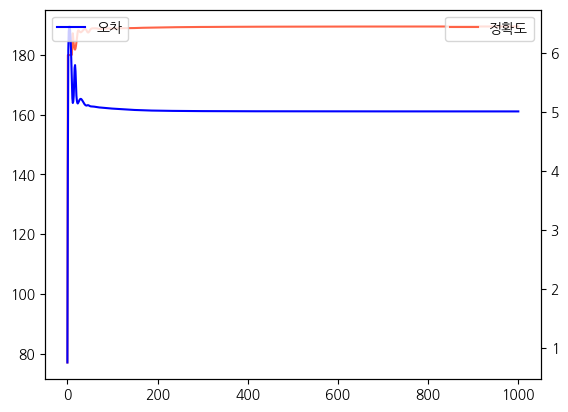

In [51]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

fig,ax1=plt.subplots()
ax1.plot(ac_list, color="tomato", label="정확도")
plt.legend(loc=1)
ax2=ax1.twinx()
ax2.plot(er_list, color="blue", label="오차")
plt.legend(loc=2)
plt.show()